In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
from PIL import Image
import csv
import numpy as np
import random
import pickle
import os
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
##image_size = (64, 64)



In [0]:

downloaded = drive.CreateFile({'id':'16fcDf1GqAMHxnujE23GWMCrzyQ6te9pL'}) 
downloaded.GetContentFile('Training_images_32.pkl')      
output = open('Training_images_32.pkl', 'rb')
x_train = pickle.load(output)      
output.close()

downloaded = drive.CreateFile({'id':'1ukS_5R6fwGzaf4jHVpJzaOe10141-ZiQ'}) 
downloaded.GetContentFile('test_images_32.pkl')      
output = open('test_images_32.pkl', 'rb')
x_test = pickle.load(output)      
output.close()

downloaded = drive.CreateFile({'id':'1qPewTCYpP592IFrtaqyKxYE-DFt-n1Rz'}) 
downloaded.GetContentFile('Training_labels_32.pkl')      
output = open('Training_labels_32.pkl', 'rb')
y_train = pickle.load(output)      
output.close()

downloaded = drive.CreateFile({'id':'1uQd1xK5QdzYOKQNhZYZii56AMzqo8Mkj'}) 
downloaded.GetContentFile('test_labels_32.pkl')      
output = open('test_labels_32.pkl', 'rb')
y_test = pickle.load(output)      
output.close()



In [117]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)


(2436, 32, 32, 3)
(569, 32, 32, 3)
(2436, 1)
(569, 1)


In [0]:

training_object = list(zip(x_train, y_train))
random.shuffle(training_object)
x_train, y_train = zip(*training_object)
x_train = np.array(x_train) 
y_train = np.array(y_train)

test_object = list(zip(x_test, y_test))
random.shuffle(test_object)
x_test, y_test = zip(*test_object)
x_test = np.array(x_test) 
y_test = np.array(y_test)

x_actual = x_test    

In [0]:
x_train = np.array(x_train)
#x_validation = np.array(x_validation)
mean_pixel = x_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = x_train.std(axis=(0, 1, 2), keepdims=True)
x_train = (x_train - mean_pixel) / std_pixel  
#x_validation = (x_validation - mean_pixel) / std_pixel
x_test = (x_test - mean_pixel) / std_pixel


# Part II: Repaired vs Regular Images = Using CNN



This is a 2 Class Classification using CNN that identifies if a given image is Repaired or Regular.




In [0]:
from keras.utils import np_utils
y_train_modified = np_utils.to_categorical(y_train, 2)
y_test_modified = np_utils.to_categorical(y_test, 2)
#y_validation = np_utils.to_categorical(y_validation, 43)


In [0]:
import os

import tensorflow as tf
from tensorflow import keras
from keras import optimizers


In [122]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import confusion_matrix
#create model
model1 = Sequential()
#add model layers
model1.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(28, kernel_size=3, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Dense(2, activation='softmax'))
model1.summary()
"""checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1)"""
#compile model using accuracy to measure model performance
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(np.array(x_train), y_train_modified, validation_data=(np.array(x_test), y_test_modified), epochs=10, batch_size=128) 
y_pred = model1.predict(x_test)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 28)        8092      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1008)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               258304    
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 514       
Total para

In [123]:
y_pred = model1.predict(x_test)
t_oss, t_acc = model1.evaluate(x_train, y_train_modified)
print("Accuracy: {:5.2f}%".format(100*t_acc))
print("Loss: {:5.2f}%".format(t_oss))

oss, acc = model1.evaluate(x_test, y_test_modified)
print("Accuracy: {:5.2f}%".format(100*acc))
print("Loss: {:5.2f}%".format(oss))

2436/2436 [==============================] - 0s 68us/step
Accuracy: 99.06%
Loss:  0.03%
569/569 [==============================] - 0s 62us/step
Accuracy: 95.08%
Loss:  0.16%


In [0]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(y_test_modified.argmax(axis=1), y_pred.argmax(axis=1))

In [125]:
accuracy = np.ones((len(x), 1), dtype='float')
accuracy = pd.DataFrame(accuracy)


df = pd.DataFrame(x)
for index, row in df.iterrows():  
  r = pd.DataFrame(row).T  
  accuracy.loc[index, 0] = round((r.loc[index, index]/r.sum(axis=1))[index], 2)
  


print(accuracy)

      0
0  0.96
1  0.93


In [126]:
from sklearn.metrics import confusion_matrix
x_ConfusionMatrix = confusion_matrix(y_test_modified.argmax(axis=1), y_pred.argmax(axis=1), labels = np.array(range(0, 2)))
print(x_ConfusionMatrix)

[[375  15]
 [ 13 166]]


In [0]:
def decode(datum):
    return np.argmax(datum)
y_actual = np.array(np.zeros(y_test.shape[0]))
for i in range(y_test_modified.shape[0]):
    
    decoded_y = decode(y_test_modified[i])
    y_actual[i] = decoded_y
    
    


def decode(datum):
    return np.argmax(datum)
y_prediction = np.array(np.zeros(y_pred.shape[0]))
for i in range(y_pred.shape[0]):
    
    decoded_y = decode(y_pred[i])
    y_prediction[i] = decoded_y

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       390
         1.0       0.92      0.93      0.92       179

   micro avg       0.95      0.95      0.95       569
   macro avg       0.94      0.94      0.94       569
weighted avg       0.95      0.95      0.95       569



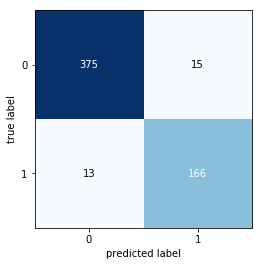

In [167]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=x_ConfusionMatrix)
plt.show()

# Part II: Repaired vs Regular Images = Using SVM



This is a 2 Class Classification using SVM that identifies if a given image is Repaired or Regular.




In [160]:

print(y_train.shape)
print(y_train.ravel().shape)

x_train_modified = x_train.reshape((len(x_train), -1))
y_train_m = y_train.ravel()
x_test_modified = x_test.reshape((len(x_test), -1))
y_test_modified = y_test.ravel()

print(x_train_modified.shape)
print(y_train_m.shape)
print(x_test_modified.shape)
print(y_test_modified.shape)


(2436, 1)
(2436,)
(2436, 3072)
(2436,)
(569, 3072)
(569,)


In [0]:
from sklearn import svm


classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(x_train_modified,y_train_m)

y_pred = classifier.predict(x_test_modified)

In [162]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(y_test_modified, y_pred)
print(x)

[[353  37]
 [ 19 160]]


In [163]:
accuracy = np.ones((len(x), 1), dtype='float')
accuracy = pd.DataFrame(accuracy)


df = pd.DataFrame(x)
for index, row in df.iterrows():  
  r = pd.DataFrame(row).T  
  accuracy.loc[index, 0] = round((r.loc[index, index]/r.sum(axis=1))[index], 2)
  


print(accuracy)

      0
0  0.91
1  0.89


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test_modified, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       390
         1.0       0.81      0.89      0.85       179

   micro avg       0.90      0.90      0.90       569
   macro avg       0.88      0.90      0.89       569
weighted avg       0.91      0.90      0.90       569



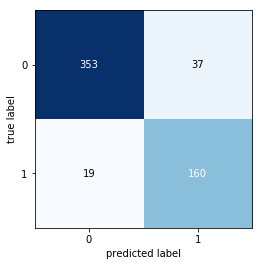

In [166]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=x)
plt.show()